# Lead Scoring

`Problem Statement`:
An education company X sells online education to industry professionals who are intersted to pursue different courses present on their website. On any given day they arrive at multiple leads. These leads could've been arrived fro the ads, refferals and other ways. The leads are followed up by phone calls and mails by the sales team.
Currently their lead conversion is only about 30 %. That means only 30 % of the people of leads are converted to an actual customer buying the product.
Now the company wants to improve the the efficiency of sales teams, so that they can make phone calls and emails only to those people who are potential customers(also know as HOT LEADS). Therefore X education has hired us to identify the driving variables and HOT LEADS.

**Team Members:**
- Achyut Karnani
- Pallavi

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing important modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

## Reading the data

In [4]:
#Reading the file and viewing it.
df=pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#viewing the shape of the data
df.shape

(9240, 37)

In [6]:
#Viewing indo of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#Using describe() on the dataframe.
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#Checking the distrubution of Coverted
df['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

## Null values Treatment

In [9]:
#Checking for null values its % and count 
round(df.isnull().sum()*100/len(df),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

After viewing the data, a lot of columns had value **Select** in them. "Select" value basically meant that the user has not selected any option given to them during the survey hence this value is equivalent to 0. Hece we are converting them to nan values

In [10]:
c_name=df.columns
c=[]
for i in c_name:
    if "Select" in df[i].values:
        c.append(i)

for i in c:
    df[i].replace("Select",np.nan,inplace=True)

**Dropping columns** with null values more than **45%**

In [11]:
c_names=df.columns
del_c=[]
for i in c_names:
    if df[i].isnull().sum()/len(df) > 0.45:
        df.drop(i,axis=1,inplace=True)
        del_c.append(i)

In [12]:
#Columns deleted are
print(del_c)

['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


Dropping **Last Activity, Last Notable Activity, Tags** as it is a column generated by sales team

In [13]:
#using value_counts() to find the mode of the data
df.drop(["Last Activity","Last Notable Activity","Tags"],axis=1,inplace=True)

## Dropping Skewed Columns

The following rows are skewed and we checked it using value_counts():
- 'Do Not Call'
- 'Search'
- 'Magazine'
- 'Digital Advertisement'
- 'Through Recommendations'
- 'Receive More Updates About Our Courses'
- 'Update me on Supply Chain Content'
- 'Get updates on DM Content'
- 'I agree to pay the amount through cheque'
- 'Newspaper Article'
- 'X Education Forums'
- 'Newspaper'
- 'What matters most to you in choosing a course'

In [14]:
#Dropping skewed columns
del_sk=['Do Not Call','Search','Magazine','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Newspaper Article','X Education Forums','Newspaper','What matters most to you in choosing a course']
df.drop(del_sk,axis=1,inplace=True)

## Impution for Null Values

In [15]:
#Rechecking for % of null values in columns
round(df.isnull().sum()*100/len(df),2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Country                                   26.63
Specialization                            36.58
What is your current occupation           29.11
City                                      39.71
A free copy of Mastering The Interview     0.00
dtype: float64

Dropping rows in which the column values are missing for more than 5 rows.

In [16]:
#Checking rows with null values more tha
sum(df.isnull().sum(axis=1) >=4)

953

In [17]:
#Dropping rows with nan, keeping the thresh=12
df.dropna(axis=0,thresh=11,inplace=True)

In [18]:
#Rechecking for % of null values in columns
round(df.isnull().sum()*100/len(df),2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.08
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                0.51
Total Time Spent on Website                0.00
Page Views Per Visit                       0.51
Country                                   18.20
Specialization                            29.52
What is your current occupation           22.29
City                                      33.09
A free copy of Mastering The Interview     0.00
dtype: float64

Imputing **Lead Source** column with mode of the data

In [19]:
#Checking values counts of Lead source to get the mode/value with highest frequency.
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Organic Search       1154
Olark Chat            917
Reference             483
Welingak Website      129
Referral Sites        125
Facebook               33
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
blog                    1
welearnblog_Home        1
WeLearn                 1
testone                 1
NC_EDM                  1
youtubechannel          1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [20]:
#Imputing null values in Lead Souce with mode value-Google
df["Lead Source"].fillna("Google",inplace=True)

Handling **Total Visit and Page Views Per Visit** null values.

In [21]:
#Fininding the no.of rows which have null values in TotalVisits and Page Views Per Visit
len(df[(df['TotalVisits'].isna()) & (df['Page Views Per Visit'].isna())])

42

In [22]:
# Rows which have null values for TotalVisits and Page Views Per Visit
df[(df['TotalVisits'].isna()) & (df['Page Views Per Visit'].isna())]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
79,3a0ce10f-d2c1-4213-a2bc-4f97bcd29699,659710,Lead Add Form,Reference,No,1,NaN,705,NaN,NaN,Hospitality Management,Working Professional,Thane & Outskirts,No
88,68f496c2-0073-470f-9c3c-7fb48f060ce5,659631,Lead Add Form,Reference,No,1,NaN,1007,NaN,NaN,Human Resource Management,Unemployed,Mumbai,No
120,144807db-2895-4002-b52e-3eda79c22395,659283,Lead Add Form,Reference,No,1,NaN,1111,NaN,NaN,Marketing Management,Working Professional,Other Cities,No
212,b6a07644-72d3-40b7-9c75-f996c6ee96a0,658258,Lead Add Form,Reference,No,1,NaN,1070,NaN,NaN,Marketing Management,Unemployed,Other Cities,No
269,35c83b23-921f-47da-8a95-5ebab14962ad,657590,Lead Add Form,Reference,No,1,NaN,1262,NaN,NaN,Operations Management,Unemployed,Other Cities of Maharashtra,No
299,149ea70e-6f74-4c23-8102-ff16b27d6b13,657247,Lead Add Form,Reference,No,1,NaN,803,NaN,NaN,Human Resource Management,Unemployed,Mumbai,No
348,aab15462-f9bd-4c1a-99f8-f1086cbbc9e0,656715,Lead Add Form,Reference,No,1,NaN,43,NaN,NaN,Media and Advertising,Unemployed,Mumbai,No
364,5befbbb7-2cf3-4a47-bb6f-086652eb131d,656563,Lead Add Form,Reference,No,1,NaN,972,NaN,NaN,Healthcare Management,Working Professional,Mumbai,No
369,5da64b7b-6302-45da-8462-872cc3cadd6a,656516,Lead Add Form,Reference,No,1,NaN,781,NaN,NaN,Supply Chain Management,Unemployed,Mumbai,No
598,6be74143-525d-11e6-96be-22000aa8e760,654187,Lead Import,Facebook,No,1,NaN,1012,NaN,NaN,Healthcare Management,Unemployed,Mumbai,No


As we observe the null values of total visits and page views per visit occur at the same data point....the corresponding total time spent on the website is not zero, which implies they have visited the page on multiple occasion. Hece we'll impute those null values with the median values.

In [23]:
#Calculating median and filling the null vaues with it
medianVisits=df['TotalVisits'].quantile(0.50)
medianpages=df['Page Views Per Visit'].quantile(0.50)

df['TotalVisits'].fillna(medianVisits, inplace=True)
df['Page Views Per Visit'].fillna(medianpages,inplace=True)

Imputing **Country** column's null values with India as it's the mode

In [24]:
#Filling na values with India in Country column
df['Country'].fillna("India",inplace=True)

Imputing **Occupation** colun with Unmployed as it is it's mode

In [25]:
#Filling na values with Unemployed in Occupation column
df['What is your current occupation'].fillna("Unemployed",inplace=True)

In [26]:
#Viewing value_counts after imputing
df['What is your current occupation'].value_counts()

Unemployed              7352
Working Professional     691
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Imputing **Specialization** column with it's highest frequency 

In [27]:
#Viewing frequency of categories of Specialization column
df['Specialization'].value_counts()

Finance Management                   974
Human Resource Management            846
Marketing Management                 834
Operations Management                501
Business Administration              400
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    336
Media and Advertising                203
Travel and Tourism                   202
International Business               177
Healthcare Management                159
Hospitality Management               113
E-COMMERCE                           111
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

As speciallization coloumn has values finance Management, HR management and Marketing Management equally high.
We'll randomly fill the na of this column with these above categories.

In [28]:
m = df['Specialization'].isnull()
#count rows with NaNs
l = m.sum()
#create array with size l
s = np.random.choice(["Finance Management","Human Resource Management","Marketing Management"], size=l)
#set NaNs values
df.loc[m, 'Specialization'] = s


In [29]:
#Viewing frequency of categories of Specialization column after imputation
df['Specialization'].value_counts()

Finance Management                   1756
Human Resource Management            1716
Marketing Management                 1628
Operations Management                 501
Business Administration               400
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     336
Media and Advertising                 203
Travel and Tourism                    202
International Business                177
Healthcare Management                 159
Hospitality Management                113
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Imputing **City** column with Mumbai as it's has the higest frequency

In [30]:
#Viewing City column for frequency of categories
df['City'].value_counts()

Mumbai                         3209
Thane & Outskirts               752
Other Cities                    684
Other Cities of Maharashtra     449
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [31]:
#Filling na values with Mumbai
df['City'].fillna("Mumbai",inplace=True)

## Correcting columns with invalid data

Changes made for Lead Source:
- Replacing google with Google, as it's misspelled with lower case g
- Replacng Live Chat with Olark Chat as Olark is a chatbot and used for chatting.
- Replacing social websites and other websites with referral sites
- Dropping Press_release row as it's an outlier

Changes made to Lead Origin:
- Dropping Quick add form as it's an outlier

Changes made to Countries:
- Binning non-indian countries into 1 category

Also Dropping Prospect ID as it isn't relevant

In [32]:
#Replacing google values to Google
c=['google','youtubechannel']
for i in c:    
    df['Lead Source']=df['Lead Source'].apply(lambda x: "Google" if x==i else x)

#Replacng Live Chat with Olark Chat.
df['Lead Source']=df['Lead Source'].apply(lambda x: "Olark Chat" if x=="Live Chat" else x)

# Replacing social websites and other websites with referral sites
c=['Facebook','bing','Click2call','Social Media','NC_EDM','blog','testone','WeLearn','Pay per Click Ads','welearnblog_Home']
for i in c:
    df['Lead Source']=df['Lead Source'].apply(lambda x: "Referral Sites" if x==i else x)

#Dropping rows with press_release as it's an outlier
df=df[df['Lead Source']!="Press_Release"]

In [33]:
#Dropping row with Quick Add Form because it's an outlier
df=df[df['Lead Origin']!="Quick Add Form"]

In [34]:
#Binning all the non-Indian countries into 1 category
df['Country']=df['Country'].apply(lambda x:"non-India" if x!="India" else "India")

In [35]:
#Dropping Prospect ID row as it is of no use in modelling
df.drop("Prospect ID",axis=1,inplace=True)

## Exploratory Data Analysis

In [36]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Country', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

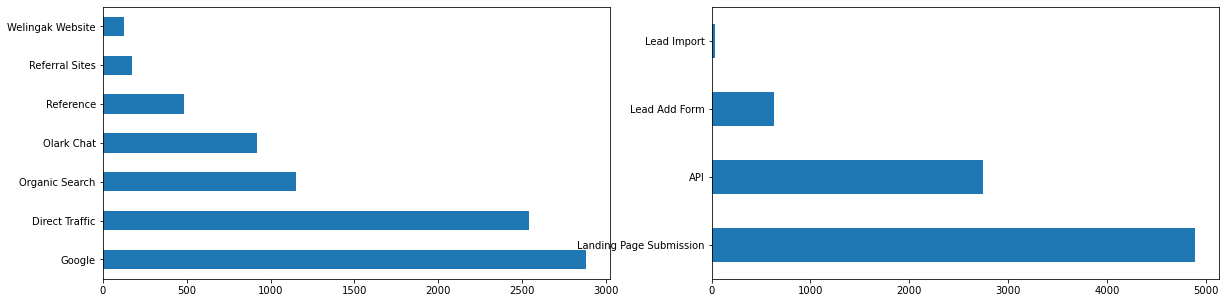

In [37]:
#Drawing bar graphs for Lead Source and Lead Origin
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
df['Lead Source'].value_counts().plot.barh()

plt.subplot(1,2,2)
df['Lead Origin'].value_counts().plot.barh()

plt.show()

`Inferences`:
1. Majority of the source is recieved through Google followed by direct traffic and then Organic Search
2.  Most of Leads are originated after Landing Page Submission. Some are also generated by API. And very few are generated by Lead Form and Lead Import

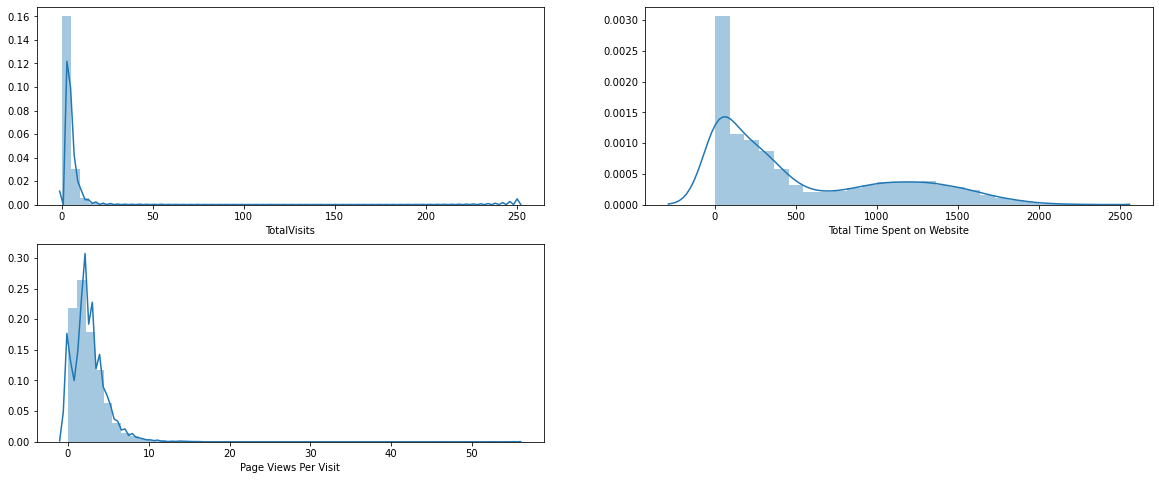

In [38]:
plt.figure(figsize=[20,8])
plt.subplot(2,2,1)
sns.distplot(df['TotalVisits'])

plt.subplot(2,2,2)
sns.distplot(df['Total Time Spent on Website'])

plt.subplot(2,2,3)
sns.distplot(df['Page Views Per Visit'])

plt.show()

`Inference`:
1. total Visits are mostly located between 0 and 25.
2. Total time spent on Website is has highest frequency at 0, then it lowers down at 500 but again starts increasing. The second bell shape represents the intrests of people in the courses.
3. Page Views per visit has the highest point in 4-5

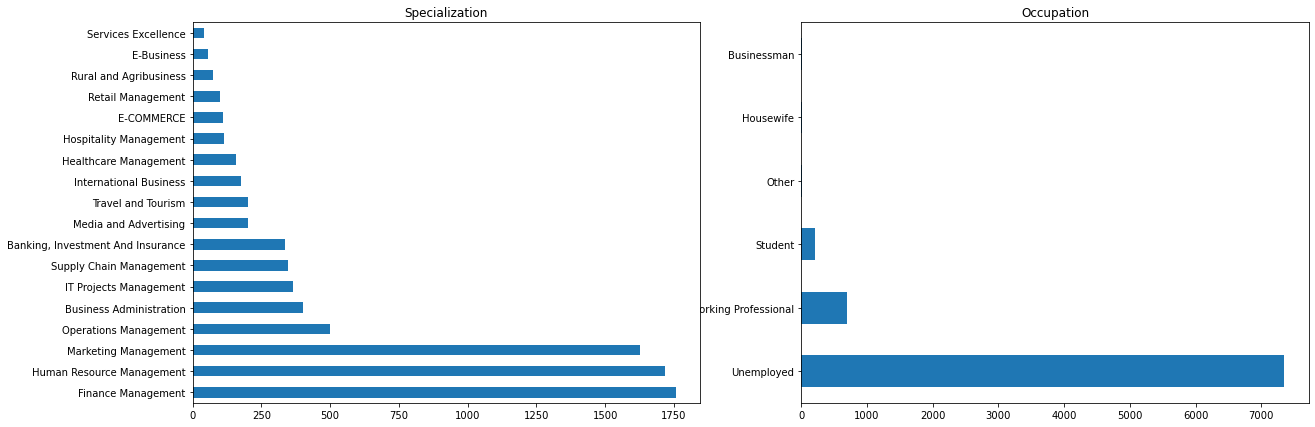

In [39]:
#barplots for occupation and reason for choosing course
plt.figure(figsize=[20,7])
plt.subplot(1,2,2)
df['What is your current occupation'].value_counts().plot.barh()
plt.title("Occupation")

plt.subplot(1,2,1)
df['Specialization'].value_counts().plot.barh()
plt.title("Specialization")

plt.show()

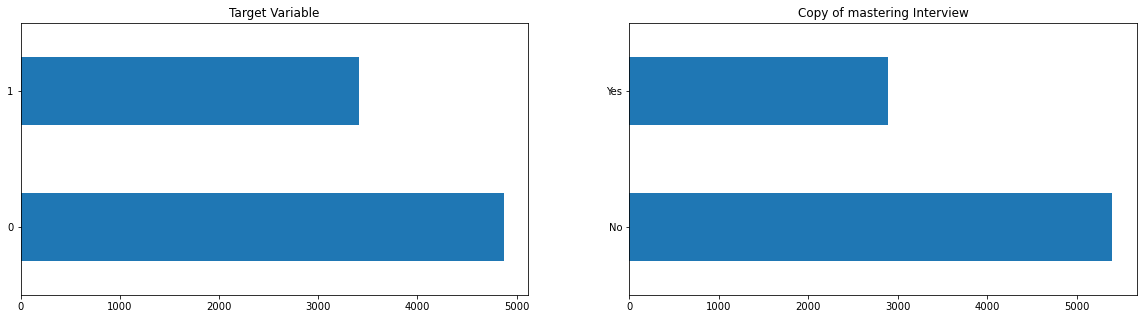

In [40]:
#barplots for occupation and reason for choosing course
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
df['Converted'].value_counts().plot.barh()
plt.title("Target Variable")

plt.subplot(1,2,2)
df['A free copy of Mastering The Interview'].value_counts().plot.barh()
plt.title("Copy of mastering Interview")

plt.show()

`Inferences`:
- The target is a categorical variable indicating logistic regression is applicable
- The data is more or less equally distributed

- no of user requiring copy of free are less compared to those who want.

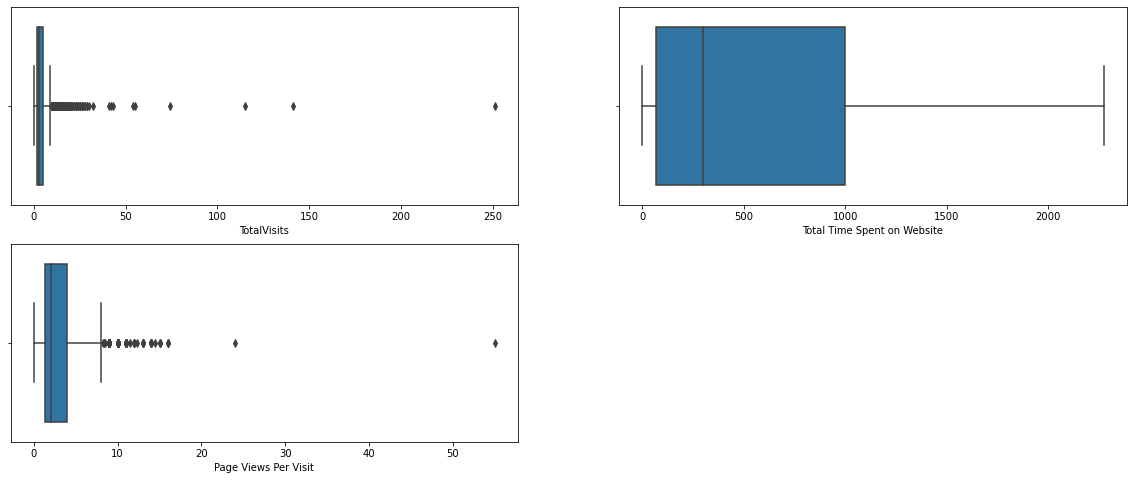

In [41]:
plt.figure(figsize=[20,8])
plt.subplot(2,2,1)
sns.boxplot(df['TotalVisits'])

plt.subplot(2,2,2)
sns.boxplot(df['Total Time Spent on Website'])

plt.subplot(2,2,3)
sns.boxplot(df['Page Views Per Visit'])

plt.show()

`Inferences`:
- Although there are few outliers, we decided to not treat them.

## Creating Dummy Variables

In [42]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Country', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

### Binning YES/NO to 0,1

In [43]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [44]:
# Creating dummy variables for the following columns
varlist=['Lead Source','Lead Origin','What is your current occupation','Country','City']

dummy1 = pd.get_dummies(df['Lead Source'],prefix="Source" ,drop_first=True)
df=pd.concat([df,dummy1],axis=1)

dummy2 = pd.get_dummies(df['Lead Origin'],prefix="Origin" ,drop_first=True)
df=pd.concat([df,dummy2],axis=1)

dummy3 = pd.get_dummies(df["What is your current occupation"],prefix="Occupation" ,drop_first=True)
df=pd.concat([df,dummy3],axis=1)

dummy4 = pd.get_dummies(df["Country"],prefix="Country" ,drop_first=True)
df=pd.concat([df,dummy4],axis=1)

dummy5 = pd.get_dummies(df["City"],prefix="City" ,drop_first=True)
df=pd.concat([df,dummy5],axis=1)

dummy6 = pd.get_dummies(df["Specialization"],prefix="Specialization" ,drop_first=True)
df=pd.concat([df,dummy6],axis=1)


df.drop(["Lead Source","Lead Origin","What is your current occupation","Country","City","Specialization"],axis=1,inplace=True)

In [45]:
# Checking datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8285 entries, 0 to 9239
Data columns (total 44 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               8285 non-null   int64  
 1   Do Not Email                              8285 non-null   int64  
 2   Converted                                 8285 non-null   int64  
 3   TotalVisits                               8285 non-null   float64
 4   Total Time Spent on Website               8285 non-null   int64  
 5   Page Views Per Visit                      8285 non-null   float64
 6   A free copy of Mastering The Interview    8285 non-null   int64  
 7   Source_Google                             8285 non-null   uint8  
 8   Source_Olark Chat                         8285 non-null   uint8  
 9   Source_Organic Search                     8285 non-null   uint8  
 10  Source_Reference                    

**Looking at the correlation of the data**

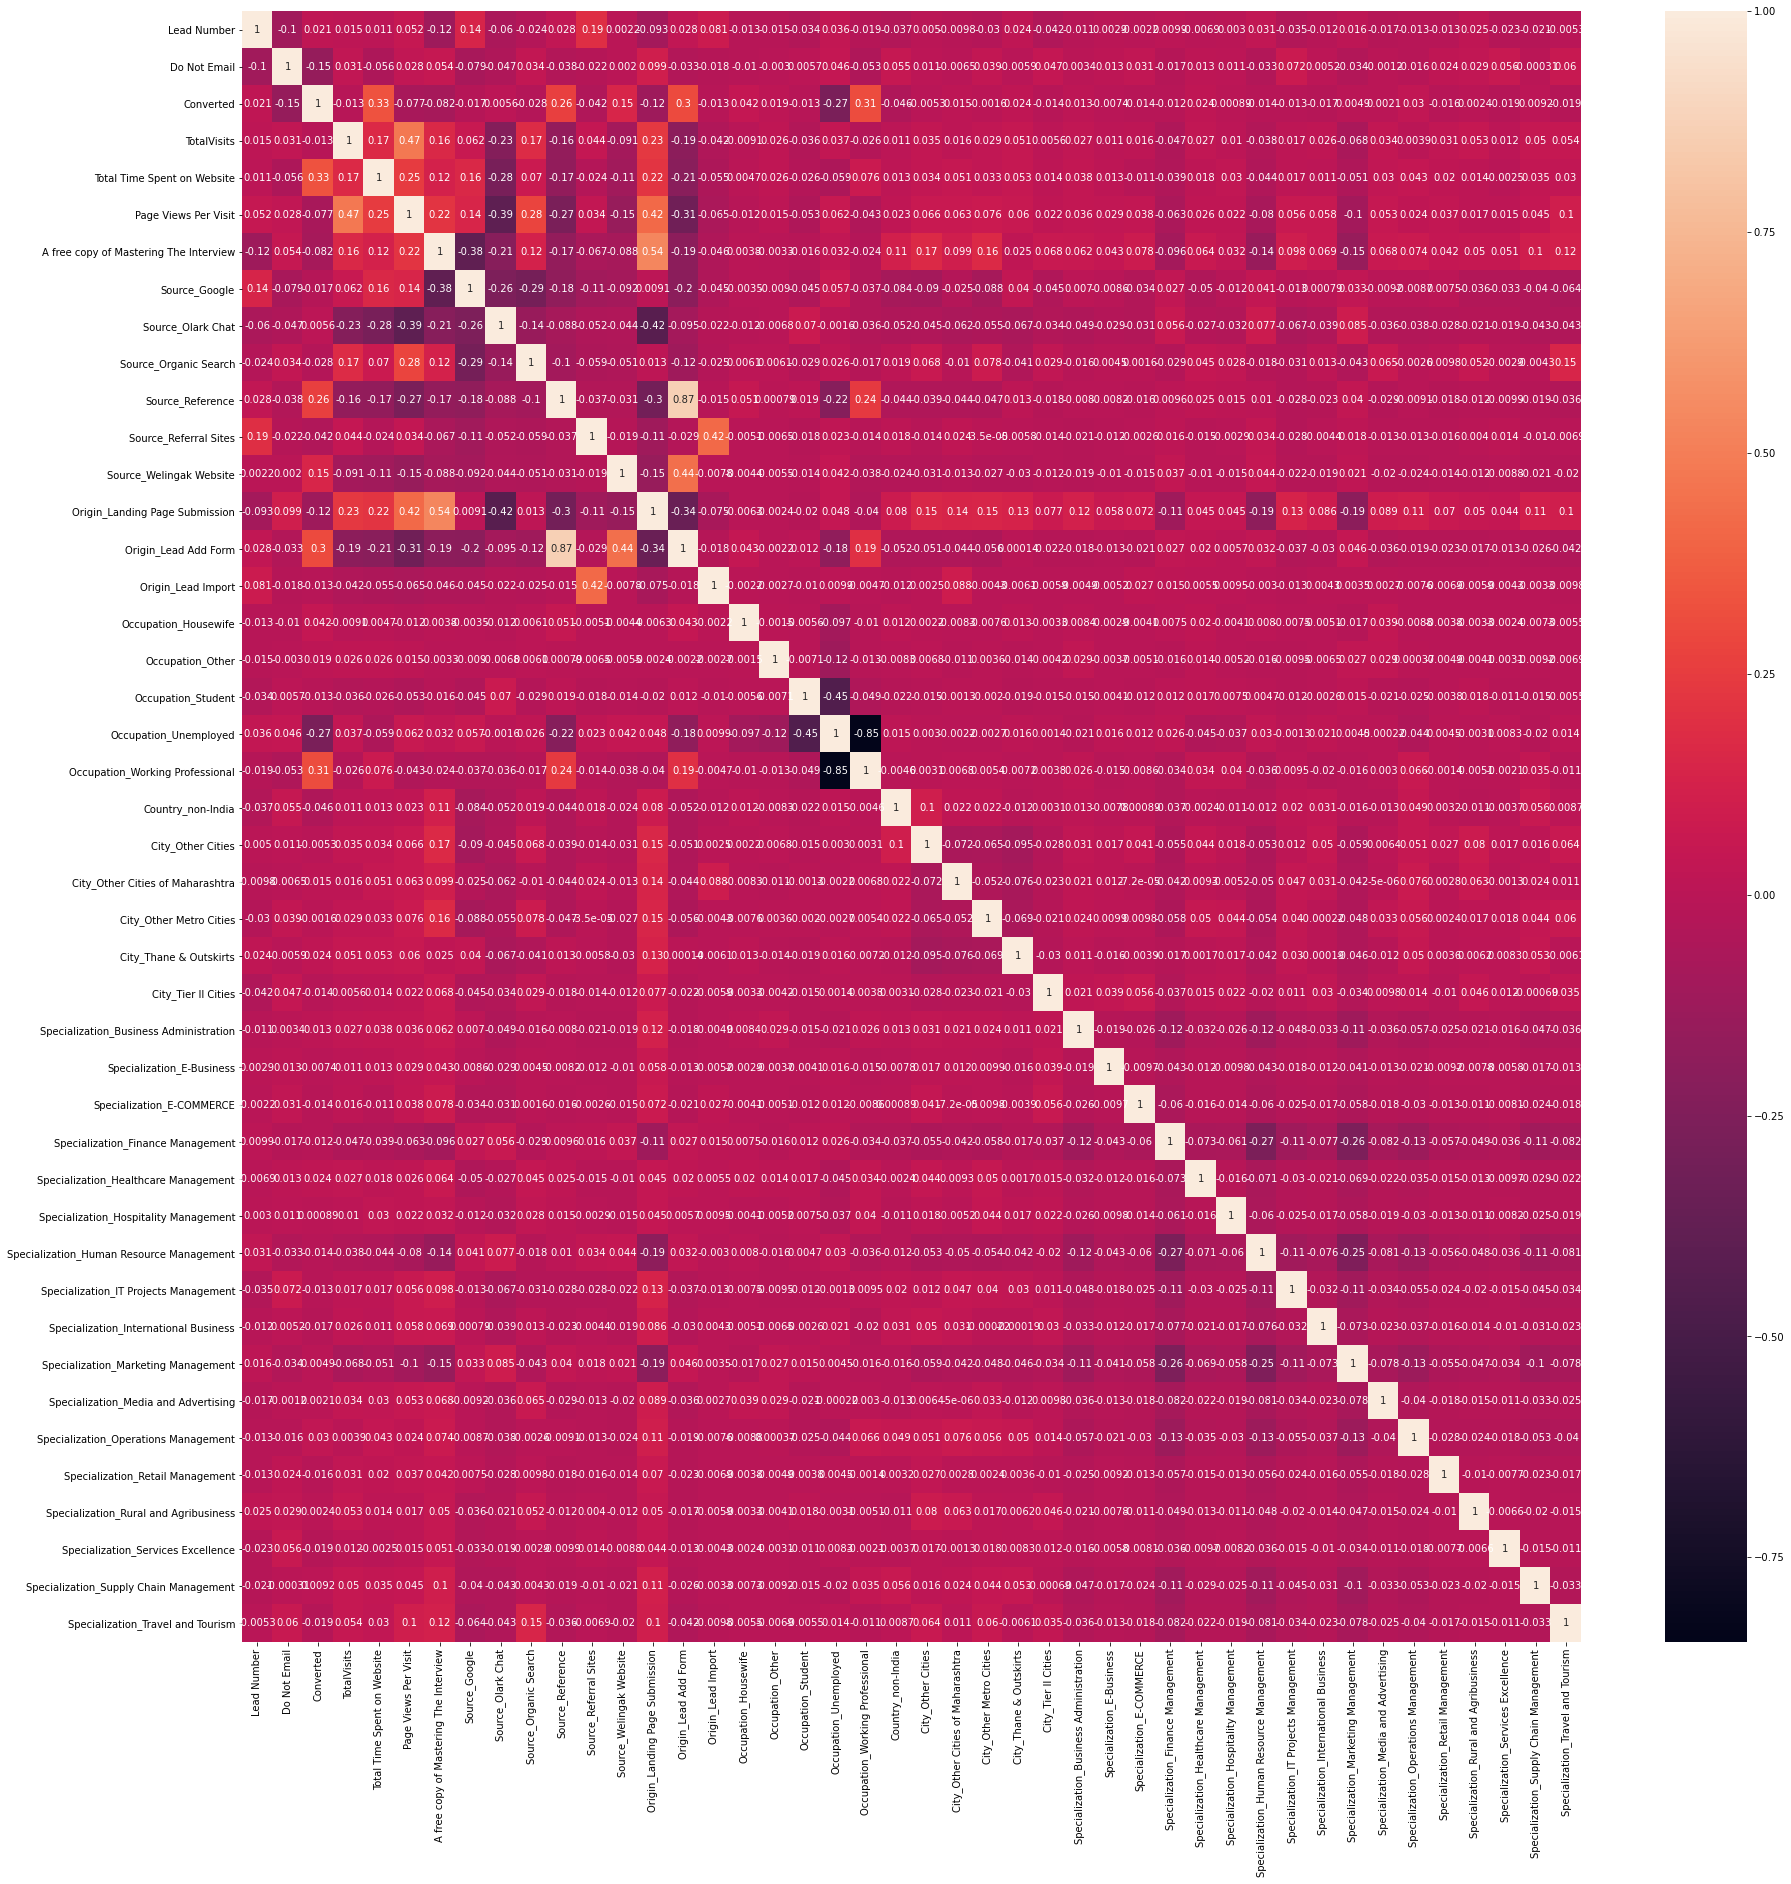

In [46]:
#Drawinf correlation heatmap
plt.figure(figsize=[30,30])
sns.heatmap(df.corr(),annot=True)
plt.show()

### Test-Train Split

In [47]:
#Putting response variable to y and remaing variable to X
y=df["Converted"]
X=df.drop(["Lead Number","Converted"],axis=1)

#Splitting th data into test and train
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7, random_state=100)

In [48]:
#Viewing the train dataset
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Source_Google,Source_Olark Chat,Source_Organic Search,Source_Reference,Source_Referral Sites,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
18,0,6.0,1688,3.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5571,0,0.0,0,0.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7347,0,3.0,1199,3.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231,0,3.0,66,3.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8723,0,2.0,228,2.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Scaling Data

In [49]:
#Creating the list of columns which require scalaing
varlist=['Total Time Spent on Website','TotalVisits','Page Views Per Visit']

#Making an object of MinMax Scalar
scaler=MinMaxScaler()
#applying fit_transform() on train data
X_train[varlist]=scaler.fit_transform(X_train[varlist])

In [50]:
#Viewing train dataset after scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Source_Google,Source_Olark Chat,Source_Organic Search,Source_Reference,Source_Referral Sites,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
18,0,0.042553,0.742958,0.125000,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5571,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7347,0,0.021277,0.527729,0.125000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231,0,0.021277,0.029049,0.125000,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8723,0,0.014184,0.100352,0.083333,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Modelling

### Selection of Features using RFE

In [51]:
#Creating object of LogisticRegression
logreg=LogisticRegression()

#Creating object of RFE
rfe=RFE(logreg,20)
#Fitting RFE on the train dataset
rfe=rfe.fit(X_train, y_train)

In [52]:
#Creating list of column names their RFE ranking and if they are selected or not
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('A free copy of Mastering The Interview', False, 23),
 ('Source_Google', True, 1),
 ('Source_Olark Chat', True, 1),
 ('Source_Organic Search', True, 1),
 ('Source_Reference', True, 1),
 ('Source_Referral Sites', False, 12),
 ('Source_Welingak Website', True, 1),
 ('Origin_Landing Page Submission', False, 18),
 ('Origin_Lead Add Form', True, 1),
 ('Origin_Lead Import', True, 1),
 ('Occupation_Housewife', True, 1),
 ('Occupation_Other', True, 1),
 ('Occupation_Student', True, 1),
 ('Occupation_Unemployed', True, 1),
 ('Occupation_Working Professional', True, 1),
 ('Country_non-India', False, 7),
 ('City_Other Cities', False, 9),
 ('City_Other Cities of Maharashtra', False, 10),
 ('City_Other Metro Cities', True, 1),
 ('City_Thane & Outskirts', False, 15),
 ('City_Tier II Cities', False, 17),
 ('Specialization_Business Administration', False, 8),
 ('Spe

In [53]:
col = X_train.columns[rfe.support_]

In [54]:
#Columns selected after RFE
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Source_Google', 'Source_Olark Chat', 'Source_Organic Search',
       'Source_Reference', 'Source_Welingak Website', 'Origin_Lead Add Form',
       'Origin_Lead Import', 'Occupation_Housewife', 'Occupation_Other',
       'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'City_Other Metro Cities',
       'Specialization_Hospitality Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence'],
      dtype='object')

### Model-I 

Running the first model with features after RFE.

In [55]:
#Adding a constant column to the database
X_train_sm = sm.add_constant(X_train[col])

#Creating an object of Logistic regression
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

#Fitting the Model
res = logm2.fit()
#Viewing the summary of the model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5799
Model:                            GLM   Df Residuals:                     5778
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2679.4
Date:                Wed, 09 Dec 2020   Deviance:                       5358.7
Time:                        09:32:36   Pearson chi2:                 6.00e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5990      1.136     -1.407      0.159      -3.826       0.628
Do Not Email                             -1.2949      0.161     -8.054      0.000      -1.610      -0.980
TotalVisits                               2.5428      1.100      2.311      0.021       0.386       4.700
Total Time Spent on Website               5.0119      0.165     30.283      0.000       4.688       5.336
Source_Google                             0.3961      0.085      4.684      0.000       0.230       0.562
Source_Olark Chat                         1.9207      0.122     15.750      0.000       1.682       2.160
Source_Organic Search                     0.2603      0.110      2.361      0.018       0.044       0.476
Source_Reference                          0.7892      1.183      0.667      0.505      -1.530       3.109
Source_Welingak Website                   2.7727      1.368      2.026      0.043       0.091       5.455
Origin_Lead Add Form                      3.6484      1.164      3.133      0.002       1.366       5.931
Origin_Lead Import                        1.7354      0.471      3.688      0.000       0.813       2.658
Occupation_Housewife                     21.7009   1.49e+04      0.001      0.999   -2.92e+04    2.92e+04
Occupation_Other                         -0.4822      1.316     -0.366      0.714      -3.062       2.098
Occupation_Student                       -1.0108      1.151     -0.878      0.380      -3.267       1.245
Occupation_Unemployed                    -0.8926      1.133     -0.788      0.431      -3.113       1.327
Occupation_Working Professional           1.9985      1.146      1.744      0.081      -0.248       4.245
City_Other Metro Cities                   0.3291      0.166      1.987      0.047       0.005       0.654
Specialization_Hospitality Management    -0.8933      0.309     -2.894      0.004      -1.498      -0.288
Specialization_Retail Management         -0.5413      0.327     -1.657      0.098      -1.182       0.099
Specialization_Rural and Agribusiness     0.6889      0.346      1.991      0.046       0.011       1.367
Specialization_Services Excellence       -0.5380      0.656     -0.820      0.412      -1.824       0.749
=========================================================================================================
"""

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Origin_Lead Add Form,40.27
6,Source_Reference,32.60
7,Source_Welingak Website,8.90
13,Occupation_Unemployed,5.17
2,Total Time Spent on Website,2.27
3,Source_Google,2.10
1,TotalVisits,2.10
14,Occupation_Working Professional,1.60
4,Source_Olark Chat,1.56
5,Source_Organic Search,1.45


`Inference`:
- Source Reference: High P and High VIF
- Occupation_Unemployed: High P and Low VIF
- Origin Lead Form: Low P and High VIF
- Source_Welingak Website: Low P and high VIF
- Occupation_Other: High P and Low VIF
- Occupation_Student: High P and Low VIF

So Let's take the decision of dropping Source Reference first 

In [57]:
#Dropping Source_Reference
col = col.drop('Source_Reference', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Source_Google', 'Source_Olark Chat', 'Source_Organic Search',
       'Source_Welingak Website', 'Origin_Lead Add Form', 'Origin_Lead Import',
       'Occupation_Housewife', 'Occupation_Other', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Working Professional',
       'City_Other Metro Cities', 'Specialization_Hospitality Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence'],
      dtype='object')

### Model-II

Running the second model after dropping Source_Reference

In [58]:
#Adding a constant column to the database
X_train_sm = sm.add_constant(X_train[col])

#Creating an object of Logistic regression
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

#Fitting the Model
res = logm2.fit()
#Viewing the summary of the model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5799
Model:                            GLM   Df Residuals:                     5779
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2679.5
Date:                Wed, 09 Dec 2020   Deviance:                       5359.1
Time:                        09:32:38   Pearson chi2:                 6.01e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5963      1.136     -1.405      0.160      -3.823       0.631
Do Not Email                             -1.2982      0.161     -8.071      0.000      -1.613      -0.983
TotalVisits                               2.5407      1.100      2.309      0.021       0.384       4.698
Total Time Spent on Website               5.0110      0.165     30.279      0.000       4.687       5.335
Source_Google                             0.3932      0.084      4.656      0.000       0.228       0.559
Source_Olark Chat                         1.9180      0.122     15.736      0.000       1.679       2.157
Source_Organic Search                     0.2586      0.110      2.346      0.019       0.043       0.475
Source_Welingak Website                   2.0038      0.749      2.676      0.007       0.536       3.471
Origin_Lead Add Form                      4.4160      0.224     19.690      0.000       3.976       4.856
Origin_Lead Import                        1.7332      0.471      3.683      0.000       0.811       2.655
Occupation_Housewife                     21.7027   1.49e+04      0.001      0.999   -2.92e+04    2.92e+04
Occupation_Other                         -0.4824      1.316     -0.367      0.714      -3.062       2.097
Occupation_Student                       -1.0101      1.151     -0.878      0.380      -3.266       1.246
Occupation_Unemployed                    -0.8931      1.133     -0.789      0.430      -3.113       1.327
Occupation_Working Professional           1.9980      1.146      1.743      0.081      -0.248       4.244
City_Other Metro Cities                   0.3286      0.166      1.985      0.047       0.004       0.653
Specialization_Hospitality Management    -0.8916      0.309     -2.890      0.004      -1.496      -0.287
Specialization_Retail Management         -0.5414      0.327     -1.657      0.098      -1.182       0.099
Specialization_Rural and Agribusiness     0.6890      0.346      1.992      0.046       0.011       1.367
Specialization_Services Excellence       -0.5384      0.656     -0.820      0.412      -1.825       0.748
=========================================================================================================
"""

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Occupation_Unemployed,5.15
2,Total Time Spent on Website,2.27
1,TotalVisits,2.10
3,Source_Google,2.09
7,Origin_Lead Add Form,1.70
13,Occupation_Working Professional,1.60
4,Source_Olark Chat,1.55
5,Source_Organic Search,1.45
6,Source_Welingak Website,1.27
0,Do Not Email,1.12


`Inference`:
- VIF of all the columns have come into the acceptable range
- Columns with high p values: Occupation_Housewife, Occupation_Other,Occupation_Student, Occupation_unemployeed, Occupation_Working Professional, Specialization_Services Excellence and Specialization_Retail Management

Let's take the decision of dropping Occupation_Housewife as it has the highest P-value.

In [60]:
#Dropping Occupation_Housewife
col = col.drop('Occupation_Housewife', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Source_Google', 'Source_Olark Chat', 'Source_Organic Search',
       'Source_Welingak Website', 'Origin_Lead Add Form', 'Origin_Lead Import',
       'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'City_Other Metro Cities',
       'Specialization_Hospitality Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence'],
      dtype='object')

### Model-III

Running the model after dropping Occupation_housewife

In [61]:
#Adding a constant column to the database
X_train_sm = sm.add_constant(X_train[col])

#Creating an object of Logistic regression
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

#Fitting the Model
res = logm2.fit()
#Viewing the summary of the model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5799
Model:                            GLM   Df Residuals:                     5780
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2681.1
Date:                Wed, 09 Dec 2020   Deviance:                       5362.1
Time:                        09:32:38   Pearson chi2:                 6.01e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.5180      0.918     -0.564      0.573      -2.318       1.282
Do Not Email                             -1.2980      0.161     -8.071      0.000      -1.613      -0.983
TotalVisits                               2.5014      1.100      2.274      0.023       0.346       4.657
Total Time Spent on Website               5.0101      0.165     30.277      0.000       4.686       5.334
Source_Google                             0.3926      0.084      4.650      0.000       0.227       0.558
Source_Olark Chat                         1.9150      0.122     15.713      0.000       1.676       2.154
Source_Organic Search                     0.2615      0.110      2.373      0.018       0.046       0.477
Source_Welingak Website                   2.0011      0.749      2.673      0.008       0.534       3.469
Origin_Lead Add Form                      4.4170      0.224     19.702      0.000       3.978       4.856
Origin_Lead Import                        1.7316      0.471      3.680      0.000       0.809       2.654
Occupation_Other                         -1.5585      1.134     -1.374      0.170      -3.782       0.665
Occupation_Student                       -2.0867      0.938     -2.225      0.026      -3.925      -0.249
Occupation_Unemployed                    -1.9698      0.915     -2.153      0.031      -3.763      -0.177
Occupation_Working Professional           0.9210      0.931      0.989      0.323      -0.904       2.746
City_Other Metro Cities                   0.3280      0.166      1.981      0.048       0.003       0.652
Specialization_Hospitality Management    -0.8920      0.309     -2.891      0.004      -1.497      -0.287
Specialization_Retail Management         -0.5414      0.327     -1.657      0.097      -1.182       0.099
Specialization_Rural and Agribusiness     0.6894      0.346      1.993      0.046       0.011       1.367
Specialization_Services Excellence       -0.5385      0.656     -0.820      0.412      -1.825       0.748
=========================================================================================================
"""

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Occupation_Unemployed,5.12
2,Total Time Spent on Website,2.27
1,TotalVisits,2.10
3,Source_Google,2.09
7,Origin_Lead Add Form,1.68
12,Occupation_Working Professional,1.59
4,Source_Olark Chat,1.54
5,Source_Organic Search,1.45
6,Source_Welingak Website,1.27
0,Do Not Email,1.12


`Inference`:
- VIF of all the columns are in permissible limit.
- Columns with high p value: Occupation_Other, Occupation_Working Professional, Specialization_Retail Management,Specialization_Services Excellence

Let's take the decision of dropping Specialization_Service Excellence as it has the highest p value

In [63]:
#Dropping Specialization_Services Excellence
col = col.drop('Specialization_Services Excellence', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Source_Google', 'Source_Olark Chat', 'Source_Organic Search',
       'Source_Welingak Website', 'Origin_Lead Add Form', 'Origin_Lead Import',
       'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'City_Other Metro Cities',
       'Specialization_Hospitality Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness'],
      dtype='object')

### Model -IV

Remodelling after dropping Specialization_Services Excellence

In [64]:
#Adding a constant column to the database
X_train_sm = sm.add_constant(X_train[col])

#Creating an object of Logistic regression
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

#Fitting the Model
res = logm2.fit()
#Viewing the summary of the model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5799
Model:                            GLM   Df Residuals:                     5781
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2681.4
Date:                Wed, 09 Dec 2020   Deviance:                       5362.9
Time:                        09:32:39   Pearson chi2:                 6.01e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.5195      0.918     -0.566      0.572      -2.320       1.281
Do Not Email                             -1.3017      0.161     -8.102      0.000      -1.617      -0.987
TotalVisits                               2.4839      1.099      2.260      0.024       0.330       4.638
Total Time Spent on Website               5.0132      0.165     30.300      0.000       4.689       5.337
Source_Google                             0.3952      0.084      4.682      0.000       0.230       0.561
Source_Olark Chat                         1.9185      0.122     15.749      0.000       1.680       2.157
Source_Organic Search                     0.2622      0.110      2.381      0.017       0.046       0.478
Source_Welingak Website                   2.0020      0.749      2.674      0.008       0.534       3.470
Origin_Lead Add Form                      4.4208      0.224     19.720      0.000       3.981       4.860
Origin_Lead Import                        1.7351      0.471      3.687      0.000       0.813       2.657
Occupation_Other                         -1.5581      1.135     -1.373      0.170      -3.782       0.666
Occupation_Student                       -2.0874      0.938     -2.225      0.026      -3.926      -0.249
Occupation_Unemployed                    -1.9719      0.915     -2.155      0.031      -3.765      -0.178
Occupation_Working Professional           0.9212      0.931      0.989      0.323      -0.904       2.747
City_Other Metro Cities                   0.3242      0.165      1.960      0.050   -9.24e-06       0.648
Specialization_Hospitality Management    -0.8902      0.309     -2.884      0.004      -1.495      -0.285
Specialization_Retail Management         -0.5394      0.327     -1.650      0.099      -1.180       0.101
Specialization_Rural and Agribusiness     0.6928      0.346      2.002      0.045       0.015       1.371
=========================================================================================================
"""

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Occupation_Unemployed,5.10
2,Total Time Spent on Website,2.27
1,TotalVisits,2.09
3,Source_Google,2.08
7,Origin_Lead Add Form,1.68
12,Occupation_Working Professional,1.59
4,Source_Olark Chat,1.54
5,Source_Organic Search,1.45
6,Source_Welingak Website,1.27
0,Do Not Email,1.12


`Inference`:
- VIF of all columns are in permissible limits.
- Columns with High P value: Occupation_Working Professional, Occupation_Other, Specialization_Retail Management

Let's take the decision of dropping Occupation_working_Professional

In [66]:
#Dropping Occupation_Working Professional
col = col.drop('Occupation_Working Professional', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Source_Google', 'Source_Olark Chat', 'Source_Organic Search',
       'Source_Welingak Website', 'Origin_Lead Add Form', 'Origin_Lead Import',
       'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed',
       'City_Other Metro Cities', 'Specialization_Hospitality Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness'],
      dtype='object')

### Model - V

Remodelling after dropping Occupation_Working Professional

In [67]:
#Adding a constant column to the database
X_train_sm = sm.add_constant(X_train[col])

#Creating an object of Logistic regression
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

#Fitting the Model
res = logm2.fit()
#Viewing the summary of the model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5799
Model:                            GLM   Df Residuals:                     5782
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2681.9
Date:                Wed, 09 Dec 2020   Deviance:                       5363.8
Time:                        09:32:40   Pearson chi2:                 6.00e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.3745      0.187      2.003      0.045       0.008       0.741
Do Not Email                             -1.3000      0.161     -8.096      0.000      -1.615      -0.985
TotalVisits                               2.4669      1.099      2.244      0.025       0.313       4.621
Total Time Spent on Website               5.0152      0.165     30.311      0.000       4.691       5.339
Source_Google                             0.3939      0.084      4.670      0.000       0.229       0.559
Source_Olark Chat                         1.9173      0.122     15.743      0.000       1.679       2.156
Source_Organic Search                     0.2583      0.110      2.346      0.019       0.043       0.474
Source_Welingak Website                   2.0022      0.749      2.674      0.007       0.535       3.470
Origin_Lead Add Form                      4.4192      0.224     19.715      0.000       3.980       4.858
Origin_Lead Import                        1.7353      0.470      3.690      0.000       0.814       2.657
Occupation_Other                         -2.4512      0.694     -3.532      0.000      -3.811      -1.091
Occupation_Student                       -2.9806      0.272    -10.969      0.000      -3.513      -2.448
Occupation_Unemployed                    -2.8649      0.177    -16.156      0.000      -3.212      -2.517
City_Other Metro Cities                   0.3255      0.165      1.969      0.049       0.001       0.650
Specialization_Hospitality Management    -0.8859      0.308     -2.873      0.004      -1.490      -0.282
Specialization_Retail Management         -0.5370      0.327     -1.645      0.100      -1.177       0.103
Specialization_Rural and Agribusiness     0.6942      0.346      2.007      0.045       0.016       1.372
=========================================================================================================
"""

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Occupation_Unemployed,3.81
1,TotalVisits,2.00
2,Total Time Spent on Website,1.98
3,Source_Google,1.91
5,Source_Organic Search,1.40
4,Source_Olark Chat,1.37
7,Origin_Lead Add Form,1.34
6,Source_Welingak Website,1.26
0,Do Not Email,1.11
10,Occupation_Student,1.08


`Inference`:
- VIF of all columns are under permissible limits.
- Column with high P value: Specialization_Retail Management

Let's take the decision of dropping Specialization_Retail Management 

In [69]:
#Dropping Specialization_Retail Management
col = col.drop('Specialization_Retail Management', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Source_Google', 'Source_Olark Chat', 'Source_Organic Search',
       'Source_Welingak Website', 'Origin_Lead Add Form', 'Origin_Lead Import',
       'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed',
       'City_Other Metro Cities', 'Specialization_Hospitality Management',
       'Specialization_Rural and Agribusiness'],
      dtype='object')

### Model -VI

Remodelling after dropping Specialization_Retail Management

In [70]:
#Adding a constant column to the database
X_train_sm = sm.add_constant(X_train[col])

#Creating an object of Logistic regression
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

#Fitting the Model
res = logm2.fit()
#Viewing the summary of the model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5799
Model:                            GLM   Df Residuals:                     5783
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2683.3
Date:                Wed, 09 Dec 2020   Deviance:                       5366.6
Time:                        09:32:41   Pearson chi2:                 6.02e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.3614      0.187      1.936      0.053      -0.005       0.727
Do Not Email                             -1.3041      0.161     -8.124      0.000      -1.619      -0.990
TotalVisits                               2.4660      1.097      2.247      0.025       0.315       4.617
Total Time Spent on Website               5.0129      0.165     30.312      0.000       4.689       5.337
Source_Google                             0.3954      0.084      4.689      0.000       0.230       0.561
Source_Olark Chat                         1.9231      0.122     15.788      0.000       1.684       2.162
Source_Organic Search                     0.2597      0.110      2.361      0.018       0.044       0.475
Source_Welingak Website                   2.0032      0.749      2.675      0.007       0.536       3.471
Origin_Lead Add Form                      4.4267      0.224     19.750      0.000       3.987       4.866
Origin_Lead Import                        1.7429      0.470      3.707      0.000       0.821       2.665
Occupation_Other                         -2.4379      0.694     -3.514      0.000      -3.798      -1.078
Occupation_Student                       -2.9737      0.272    -10.952      0.000      -3.506      -2.442
Occupation_Unemployed                    -2.8591      0.177    -16.135      0.000      -3.206      -2.512
City_Other Metro Cities                   0.3254      0.165      1.969      0.049       0.001       0.649
Specialization_Hospitality Management    -0.8784      0.308     -2.849      0.004      -1.483      -0.274
Specialization_Rural and Agribusiness     0.7011      0.346      2.027      0.043       0.023       1.379
=========================================================================================================
"""

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Occupation_Unemployed,3.80
1,TotalVisits,2.00
2,Total Time Spent on Website,1.98
3,Source_Google,1.91
5,Source_Organic Search,1.40
4,Source_Olark Chat,1.37
7,Origin_Lead Add Form,1.34
6,Source_Welingak Website,1.26
0,Do Not Email,1.11
10,Occupation_Student,1.08


`Inference`:
All the VIF and P value are in permissible limit.

Hence this is our final Model

### Making Predictions

In [72]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

18      0.849023
5571    0.991740
7347    0.644640
231     0.091149
8723    0.154456
7795    0.115423
2803    0.183314
1968    0.213044
1716    0.685433
7442    0.820893
dtype: float64

In [73]:
#Creating a dataframe with actual Converted values and predicted probability
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
18,1,0.849023,18
5571,1,0.991740,5571
7347,1,0.644640,7347
231,0,0.091149,231
8723,0,0.154456,8723


### ROC Curve

In [74]:
#Defininf the function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [75]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

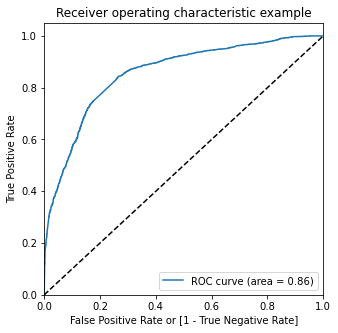

In [76]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

`Inference`:
The ROC is closer to the left border and top border. Also the AUC is 0.86 which tels that the test is accurate 

### Optimal Probabilty Cut-off

In [77]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
18,1,0.849023,18,1,1,1,1,1,1,1,1,1,0
5571,1,0.991740,5571,1,1,1,1,1,1,1,1,1,1
7347,1,0.644640,7347,1,1,1,1,1,1,1,0,0,0
231,0,0.091149,231,1,0,0,0,0,0,0,0,0,0
8723,0,0.154456,8723,1,1,0,0,0,0,0,0,0,0


In [78]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.408691  1.000000  0.000000
0.1   0.1  0.498189  0.986076  0.160980
0.2   0.2  0.713054  0.902954  0.581802
0.3   0.3  0.770133  0.860759  0.707495
0.4   0.4  0.793758  0.732068  0.836395
0.5   0.5  0.780652  0.655696  0.867017
0.6   0.6  0.765304  0.571730  0.899096
0.7   0.7  0.742714  0.463291  0.935841
0.8   0.8  0.720641  0.362869  0.967921
0.9   0.9  0.677531  0.223629  0.991251


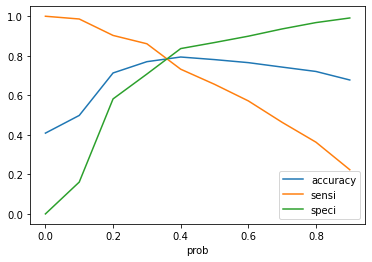

In [79]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

`Inference`:
From the above curve, we can take the cuttoff probabilty as 0.35

In [80]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
18,1,0.849023,18,1,1,1,1,1,1,1,1,1,0,1
5571,1,0.991740,5571,1,1,1,1,1,1,1,1,1,1,1
7347,1,0.644640,7347,1,1,1,1,1,1,1,0,0,0,1
231,0,0.091149,231,1,0,0,0,0,0,0,0,0,0,0
8723,0,0.154456,8723,1,1,0,0,0,0,0,0,0,0,0


### Model Performance

The aim of the the project is to correctly identify a potential lead. Therefore, the model cannot afford to declare something negative when it is actually positive. i.e the False negative should be reduced. Hence the metric for evaluation which we'll choose is **Recall**

The model can afford a false positive i.e we can afford to qualify someone as a potential lead when it is not as ultimately we are just going to make a call/ email for further discussion. But same does not apply for false negative.

In [81]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7787549577513364

**Confusion Matrix**

In [82]:
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
confusion

array([[2535,  894],
       [ 389, 1981]], dtype=int64)

#### Precision 

Precision= True Positive/ True Positive+ False Positive

In [83]:
#Calculation Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6890434782608695

#### Recall

Recall= True Positive/ True Positive+ False Negative

In [84]:
#Calculating Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8358649789029536

Altough the precision isn't high but we have Pretty good recall score and that's what matters.

## Model Evaluation on Test Data

### Scaling the data

In [85]:
#applying transform() on test data
X_test[varlist]=scaler.transform(X_test[varlist])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Source_Google,Source_Olark Chat,Source_Organic Search,Source_Reference,Source_Referral Sites,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
2328,0,0.000000,0.000000,0.000000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5069,0,0.014184,0.146567,0.083333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2809,0,0.021277,0.597271,0.125000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4741,0,0.007092,0.090669,0.041667,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7962,0,0.021277,0.566021,0.062500,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Making Predictions

In [86]:
#Adding a constant to the test dataset
X_test_sm = sm.add_constant(X_test[col])

# Getting the predicted values on the train set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

#Creating a dataframe with actual Converted values and predicted probability
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred_final['LeadID']=y_test.index
y_test_pred_final.head()

,Converted,Converted_Prob,LeadID
2328,0,0.360149,2328
5069,0,0.150834,5069
2809,1,0.719942,2809
4741,0,0.116523,4741
7962,0,0.687298,7962


In [87]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_test_pred_final.head()

,Converted,Converted_Prob,LeadID,final_predicted
2328,0,0.360149,2328,1
5069,0,0.150834,5069,0
2809,1,0.719942,2809,1
4741,0,0.116523,4741,0
7962,0,0.687298,7962,1


### Model Evauation

**Accuaracy**

In [88]:
#Cheking the accuracy of the model on test data
metrics.accuracy_score(y_test_pred_final.Converted,y_test_pred_final.final_predicted)

0.7510056315366049

**Recall**

In [89]:
#Calculating recall for test prediction
recall_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.8076555023923445

## Generating Score Variable for Test Data

In [90]:
#Assiging lead score values to the test data set
X_test['Lead Score']=y_test_pred_final.Converted_Prob *100

In [91]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Source_Google,Source_Olark Chat,Source_Organic Search,Source_Reference,Source_Referral Sites,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Score
2328,0,0.000000,0.000000,0.000000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,36.014905
5069,0,0.014184,0.146567,0.083333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.083420
2809,0,0.021277,0.597271,0.125000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,71.994156
4741,0,0.007092,0.090669,0.041667,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.652320
7962,0,0.021277,0.566021,0.062500,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,68.729812
